In [72]:
import pandas as pd
import numpy as np
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

## Importing data (just original for now)

In [73]:
data = pd.read_csv("../../Data/Best&Heckman/BestHeckman+SDSS+wise+LOFAR_better.csv")

# Only selecting data with a classification
data = data[data['Classification'] != 'Radio-loud AGN'] 

In [74]:
X = data.drop(columns=['Classification', 'RAJ2000', 'DEJ2000', 'SimbadName', 'E_Total_flux', 'E_Peak_flux', 'wise_ra',
       'wise_dec', 'tmass_key'])
y = data['Classification']

# Dropping columns with little data (optional)

In [75]:
#X = X.drop(columns=['Total_flux', 'Peak_flux'])

## Filter by thin redshift slice (optional)

<AxesSubplot:>

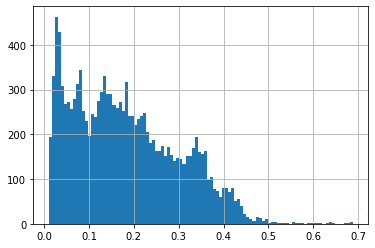

In [76]:
X.Z_BEST.hist(bins=100)

In [77]:
z = 0
#z = 3
delta_z = 0.3

redshift_filt = (X.Z_BEST >z) & (X.Z_BEST <(z+delta_z))
X_sliced = X[redshift_filt]

In [78]:
len(X_sliced)

10685

# Dropping redshift column (optional)

In [79]:
X_sliced = X_sliced.drop(columns='Z_BEST')

## Filling nan's

In [80]:
# fill nans with 0s
#X_filled = X.fillna(0)

# FIlling with mean, filling with 0s caused a weird split into 2 groups
#imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
#X_filled = imp_mean.fit_transform(X)

imp = IterativeImputer(max_iter=100, min_value=0)
X_filled = imp.fit_transform(X_sliced)

## Scaling (necessary for proper usage of T-sne)

In [81]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler

scaler = StandardScaler()
X_final = scaler.fit_transform(X_filled)

## Running t-sne

In [85]:
# 30 with z=0.2-0.7 is nice, also with droppig columns
tsne = TSNE(perplexity=40, 
            init='random', 
            n_iter=10**5, 
            verbose=5, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto',
            #random_state=42
           )

In [86]:
X_transformed = tsne.fit_transform(X_final)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 10685 samples in 0.030s...
[t-SNE] Computed neighbors for 10685 samples in 0.992s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10685
[t-SNE] Computed conditional probabilities for sample 2000 / 10685
[t-SNE] Computed conditional probabilities for sample 3000 / 10685
[t-SNE] Computed conditional probabilities for sample 4000 / 10685
[t-SNE] Computed conditional probabilities for sample 5000 / 10685
[t-SNE] Computed conditional probabilities for sample 6000 / 10685
[t-SNE] Computed conditional probabilities for sample 7000 / 10685
[t-SNE] Computed conditional probabilities for sample 8000 / 10685
[t-SNE] Computed conditional probabilities for sample 9000 / 10685
[t-SNE] Computed conditional probabilities for sample 10000 / 10685
[t-SNE] Computed conditional probabilities for sample 10685 / 10685
[t-SNE] Mean sigma: 0.133362
[t-SNE] Computed conditional probabilities in 1.003s
[t-SNE] Iteration 50: error = 93.74

2906
7496
283


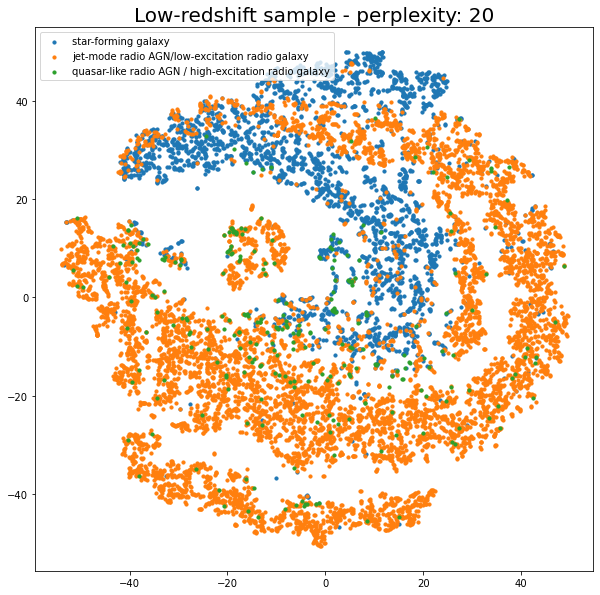

In [87]:
plt.figure(figsize=(10,10))
classes = ['star-forming galaxy',
           'jet-mode radio AGN/low-excitation radio galaxy',
           'quasar-like radio AGN / high-excitation radio galaxy',
       ]
for i in classes:
    #filt = y.loc[sample.index]['Classification']==i
    filt = y[redshift_filt]==i
    print(sum(filt))
    plt.scatter(X_transformed[:,0][filt], X_transformed[:,1][filt], s=10,label=i)
plt.legend()
plt.title('Low-redshift sample - perplexity: 20', fontsize=20)
plt.savefig('BH_t-sne.pdf', bbox_inches='tight')
plt.show()

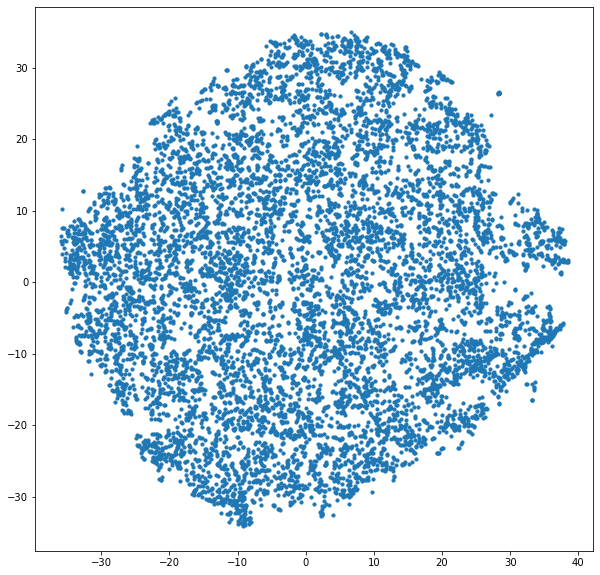

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(X_transformed[:,0], X_transformed[:,1], s=10)

In [60]:
tempdata = np.hstack((X_filled, X_transformed, y[redshift_filt].to_numpy()[:, np.newaxis]))
columns = list(X.columns)
columns.extend(['x', 'y', 'class'])

temp = pd.DataFrame(data=tempdata, columns=columns)
temp.to_csv('temp.csv', index=False)

## In a loop

In [18]:
for i in range(5,105,5):
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_final)
    
    print(i, tsne.kl_divergence_)
    

5 1.6493498086929321
10 1.6660436391830444
15 1.6204009056091309
20 1.6090083122253418
25 1.620467185974121
30 1.535269021987915
35 1.5188930034637451
40 1.473624587059021
45 1.5041918754577637
50 1.4532320499420166
55 1.4608043432235718
60 1.3900879621505737
65 1.3612655401229858
70 1.3629611730575562
75 1.340827465057373
80 1.3243322372436523
85 1.297702431678772
90 1.2763826847076416
95 1.2608606815338135
100 1.2452185153961182


In [19]:
for i in range(100,205,5):
    tsne = TSNE(perplexity=i, 
            init='random', 
            n_iter=10**4, 
            verbose=0, 
            n_jobs=8, 
            n_iter_without_progress=200,
            min_grad_norm=1e-4,
            learning_rate='auto'
           )
    
    X_transformed = tsne.fit_transform(X_final)
    
    print(i, tsne.kl_divergence_)
    

100 1.2418547868728638
105 1.2238565683364868
110 1.204561471939087
115 1.2019169330596924
120 1.2089914083480835
125 1.1584144830703735
130 1.1465884447097778
135 1.131151795387268
140 1.1277620792388916
145 1.1076711416244507
150 1.0899087190628052
155 1.0812368392944336
160 1.0684322118759155
165 1.046805739402771
170 1.0677714347839355
175 1.0468794107437134
180 1.0352542400360107
185 1.0370965003967285
190 1.029921054840088
195 1.017843246459961
200 1.0079965591430664


In [88]:
X.columns

Index(['Z_BEST', 'u_flux_corr', 'g_flux_corr', 'R_flux_corr', 'I_flux_corr',
       'z_flux_corr', 'ch1_flux_corr', 'ch2_flux_corr', 'J_flux_corr',
       'H_flux_corr', 'Ks_flux_corr', 'Total_flux', 'Peak_flux'],
      dtype='object')